# An√°lisis de Supuestos

Cuando se realiza una regresi√≥n lineal, se asume que los datos cumplen ciertos supuestos. Si estos supuestos no se cumplen, los resultados del modelo pueden no ser v√°lidos. A continuaci√≥n damos una explicaci√≥n de cada uno de estos supuestos y c√≥mo se verifican:


Primero carguemos los datos a utilizar y el modelo, con igual valor de variables del archivo de regresion lineal. 

Variables independientes : `teamSkill`, `Experience`, `Overtakes`

Variable a predecir (dependiente): `ReactionTime`

Para ello hagamos un estudio por escuder√≠a

In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Load the data
data = pd.read_csv("formula1_enhanced_data_final.csv")

# Select relevant features and target
features = ['DriverSkill', 'Experience', 'Overtakes']
target = 'ReactionTime'

# Initialize a dictionary to store R¬≤ values for each team
team_r_squared = {}

# Iterate through unique teams
for team in data['Team'].unique():
    team_data = data[data['Team'] == team]
    
    # Check if we have enough data for this team
    if len(team_data) < 10:  # You might want to adjust this threshold
        print(f"Skipping {team} due to insufficient data")
        continue

    # Prepare the data
    X = team_data[features]
    y = team_data[target]

    # Handle missing values
    X = X.dropna()
    y = y[X.index]

    # Check if we still have enough data after dropping NA values
    if len(X) < 10:
        print(f"Skipping {team} due to insufficient data after removing NA values")
        continue

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train the model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    # Calculate R-squared
    r_squared = model.score(X_test_scaled, y_test)
    
    # Store the R¬≤ value
    team_r_squared[team] = r_squared

# Sort teams by R¬≤ value
sorted_teams = sorted(team_r_squared.items(), key=lambda x: x[1], reverse=True)

# Print results
print("\nR¬≤ values for each team:")
for team, r_squared in sorted_teams:
    print(f"{team}: R¬≤ = {r_squared:.4f}")

# Calculate and print the average R¬≤ across all teams
average_r_squared = np.mean(list(team_r_squared.values()))
print(f"\nAverage R¬≤ across all teams: {average_r_squared:.4f}")

# Find the team with the highest R¬≤
best_team = max(team_r_squared, key=team_r_squared.get)
print(f"\nteam with the highest R¬≤: {best_team} (R¬≤ = {team_r_squared[best_team]:.4f})")

# Find the team with the lowest R¬≤
worst_team = min(team_r_squared, key=team_r_squared.get)
print(f"team with the lowest R¬≤: {worst_team} (R¬≤ = {circuit_r_squared[worst_circuit]:.4f})")





R¬≤ values for each team:
Aston Martin: R¬≤ = 0.7140
Alpine: R¬≤ = 0.6154
Red Bull: R¬≤ = 0.5974
Alfa Romeo: R¬≤ = 0.5697
AlphaTauri: R¬≤ = 0.5511
McLaren: R¬≤ = 0.5422
Haas: R¬≤ = 0.5186
Ferrari: R¬≤ = 0.4113
Mercedes: R¬≤ = 0.1394
Williams: R¬≤ = -0.1761

Average R¬≤ across all teams: 0.4483

team with the highest R¬≤: Aston Martin (R¬≤ = 0.7140)
team with the lowest R¬≤: Williams (R¬≤ = -0.1761)


Consideremos entonces la expresi√≥n de la regresi√≥n lineal de la escuder√≠a de Red Bull.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import io
from urllib.request import urlopen


# Print column names
print("Available columns:")
print(data.columns.tolist())

# Select a specific team (for example, let's use 'Hamilton')
team_name = 'Red Bull'
team_data = data[data['Team'] == team_name].copy()

if team_data.empty:
    print(f"No data found for team {team_name}")
    print("Available teams:")
    print(data['Team'].unique())
    exit()

print(f"\nAnalyzing data for team: {team_name}")
print(f"Number of races: {len(team_data)}")

# Select relevant features
features = ['DriverSkill', 'Experience', 'Overtakes']
target = 'ReactionTime'

# Check if columns exist and remove those that don't
features = [f for f in features if f in data.columns]
if target not in data.columns:
    raise ValueError(f"Target column '{target}' not found in the dataset")

print(f"\nUsing features: {features}")
print(f"Target: {target}")
for feature in features:
    team_data[feature] = pd.to_numeric(team_data[feature], errors='coerce')
team_data = team_data.dropna(subset=features + [target])

# Split the data for the selected team (only Hamilton's data)
X = team_data[features]
y = team_data[target]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

for feature in features:
    team_data[feature] = pd.to_numeric(team_data[feature], errors='coerce')

# Eliminando las filas con valores faltantes
team_data = team_data.dropna(subset=features + [target])

# Definiendo las variables X (independientes) y y (dependiente)
X = team_data[features]
y = team_data[target]

# A√±adiendo una constante (intercepto) a las variables independientes
X = sm.add_constant(X)

# Ajustando el modelo OLS (Ordinary Least Squares)
model = sm.OLS(y, X).fit()

# Mostrando el resumen del modelo
print(model.summary())


Available columns:
['Date', 'Driver', 'Age', 'Team', 'Circuit', 'PitStopTime', 'ReactionTime', 'FinalPosition', 'DNF', 'Points', 'MaxSpeed', 'Overtakes', 'Experience', 'DriverSkill', 'CarPerformance', 'TrackFamiliarity', 'WeatherCondition', 'TyreCompound', 'EngineMode', 'QualifyingPosition', 'TyreWear', 'FuelConsumption', 'DownforceLevel', 'FinalRaceTime']

Analyzing data for team: Red Bull
Number of races: 47

Using features: ['DriverSkill', 'Experience', 'Overtakes']
Target: ReactionTime
                            OLS Regression Results                            
Dep. Variable:           ReactionTime   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     13.37
Date:                Tue, 04 Feb 2025   Prob (F-statistic):           2.67e-06
Time:                        00:40:18   Log-Likelihood:                 109.94
No. Observations:              

## Media de Errores a Cero y la Suma de los Errores es Cero

Supuesto que se deriva del m√©todo de M√≠nimos Cuadrados Ordinarios (OLS).
La media de los residuos (errores) debe ser aproximadamente cero.La suma de los errores tambi√©n debe ser cero o muy cercana a cero.
Esto garantiza que el modelo no est√© sesgado, es decir, que en promedio no sobreestime ni subestime los valores reales.

Verifiquemos entonces:

In [4]:
import numpy as np

# Obtener las predicciones del modelo
y_pred = model.predict(X)

# Calcular los residuos (errores)
residuals = y - y_pred

# Calcular la media y la suma de los errores
mean_residuals = np.mean(residuals)
sum_residuals = np.sum(residuals)

print(f"üìå Media de los residuos: {mean_residuals:.6f}")
print(f"üìå Suma de los residuos: {sum_residuals:.6f}")


NameError: name 'model' is not defined

El valor 0.37596 como media de los residuos indica que, en promedio, las predicciones del modelo tienen un peque√±o sesgo positivo.

## Linealidad

- **Qu√© es**: Este supuesto indica que la relaci√≥n entre las variables independientes y la variable dependiente es lineal. Es decir, la variable dependiente cambia de forma proporcional con las independientes.

- **Herramienta**: Gr√°fico de Pares (Pairplot)

Un pairplot genera gr√°ficos de dispersi√≥n entre todas las variables, mostrando las relaciones entre ellas.
Objetivo: A trav√©s de este gr√°fico, buscamos ver si hay una relaci√≥n lineal entre las variables independientes (por ejemplo, DownforceLevel) y la dependiente (como MaxSpeed).
Interpretaci√≥n: Si las relaciones visualizadas parecen seguir una l√≠nea recta, podemos decir que se cumple el supuesto de linealidad.


Analyzing data for team: Red Bull
Number of races: 47


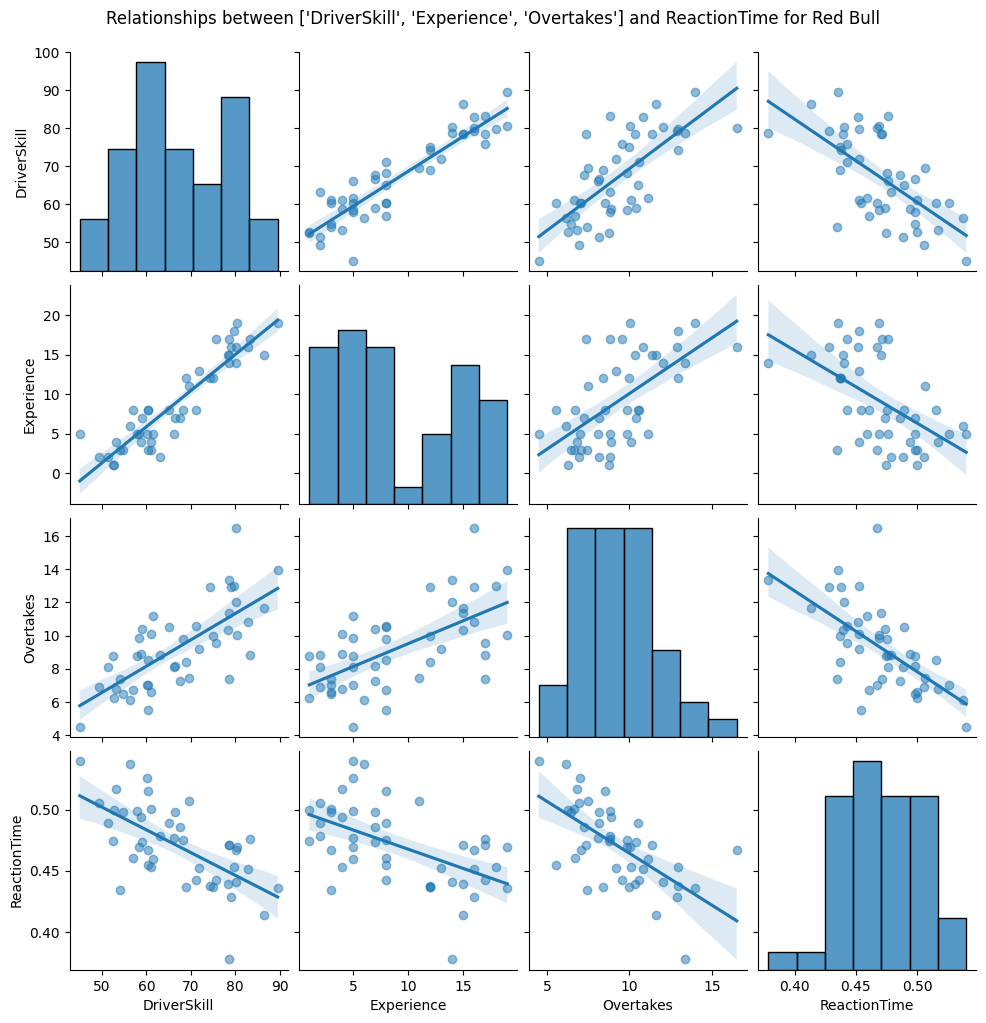

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Cargar los datos (aseg√∫rate de tener el archivo CSV en la misma carpeta o proporciona la ruta correcta)
data = pd.read_csv('formula1_enhanced_data_final.csv')

# Filtrar los datos para un equipo espec√≠fico, por ejemplo, 'Red Bull'
team_name = 'Red Bull'
team_data = data[data['Team'] == team_name].copy()

if team_data.empty:
    print(f"No data found for team {team_name}")
    print("Available teams:")
    print(data['Team'].unique())
    exit()

print(f"\nAnalyzing data for team: {team_name}")
print(f"Number of races: {len(team_data)}")

# Seleccionar las variables relevantes
features = ['DriverSkill', 'Experience', 'Overtakes']
target = 'ReactionTime'

# Comprobar si las columnas existen y eliminar aquellas que no
features = [f for f in features if f in data.columns]
if target not in data.columns:
    raise ValueError(f"Target column '{target}' not found in the dataset")

# Limpiar datos nulos
for feature in features:
    team_data[feature] = pd.to_numeric(team_data[feature], errors='coerce')
team_data = team_data.dropna(subset=features + [target])

# Crear el gr√°fico de pares (pairplot)
sns.pairplot(team_data[features + [target]], kind='reg', plot_kws={'scatter_kws': {'alpha': 0.5}})
plt.suptitle(f'Relationships between {features} and {target} for {team_name}', y=1.02)
plt.show()


In [ ]:
El suspuesto de linealidad no parece incumplirse. Las relaciones visualizadas parecer seguir una  l√≠nea recta.

## Normalidad de los Residuos

- **Qu√© es**: Los residuos son las diferencias entre los valores observados y los valores predichos por el modelo. Este supuesto indica que los residuos deben seguir una distribuci√≥n normal, lo cual es importante para hacer inferencias estad√≠sticas v√°lidas.

- **Herramientas para verificar la normalidad**:

1. `Histograma de los residuos`
El histograma de los residuos muestra c√≥mo se distribuyen estos errores. Si la distribuci√≥n de los residuos se parece a una curva de campana (distribuci√≥n normal), el supuesto se cumple.

2. `Test de Shapiro-Wilk`
Este es un test estad√≠stico que eval√∫a si los residuos siguen una distribuci√≥n normal.
Interpretaci√≥n del p-value:
Si el p-value es mayor que 0.05, significa que no podemos rechazar la hip√≥tesis nula de que los residuos son normales (por lo tanto, el supuesto de normalidad se cumple).
Si el p-value es menor que 0.05, los residuos no siguen una distribuci√≥n normal y el modelo puede no ser v√°lido.


In [3]:
residuals = y_train - model.predict(X)
sns.histplot(residuals, kde=True)
plt.title('Distribuci√≥n de los residuos')
plt.show()

NameError: name 'y_train' is not defined

Parece tener la forma de campana que busca la normlidad de los datos , pero comprobemos con el test de `Shapiro-Wilk`

In [24]:
from scipy.stats import shapiro

residuals = model.resid  # En statsmodels, los residuos se obtienen as√≠ directamente

# Aplicar el Test de Shapiro-Wilk
shapiro_test = shapiro(residuals)

# Mostrar resultados
print("\nShapiro-Wilk Test for Normality:")
print(f"Test Statistic: {shapiro_test.statistic:.4f}")
print(f"P-value: {shapiro_test.pvalue:.4f}")


Shapiro-Wilk Test for Normality:
Test Statistic: 0.9696
P-value: 0.2560


Realizada la prueba se comprueba perfectamente que los residuos siguen una distribuci√≥n normal, lo que es bueno para la regresi√≥n lineal.

## Homocedasticidad

- **Qu√© es**: Este supuesto afirma que la varianza de los residuos debe ser constante para todos los valores de las predicciones. Si la varianza de los residuos cambia (es decir, es m√°s grande para ciertos valores de la variable dependiente), se dice que hay heterocedasticidad.

- **Herramientas para verificar la homocedasticidad**:

1. `Gr√°fico de Predicciones vs Residuos`
En este gr√°fico se comparan los residuos con las predicciones generadas por el modelo.Interpretaci√≥n: Si los residuos se dispersan de manera uniforme alrededor de cero en todo el rango de predicciones (sin formar patrones), el supuesto de homocedasticidad se cumple. Si los residuos se agrupan o dispersan de manera no uniforme, puede haber heterocedasticidad.

2. `Test de Breusch-Pagan`
Este test estad√≠stico eval√∫a la existencia de heterocedasticidad en el modelo.
Interpretaci√≥n del p-value:
Si el p-value es mayor que 0.05, el modelo no presenta heterocedasticidad, lo que significa que se cumple el supuesto de homocedasticidad.
Si el p-value es menor que 0.05, indica heterocedasticidad, lo cual es problem√°tico para el modelo.

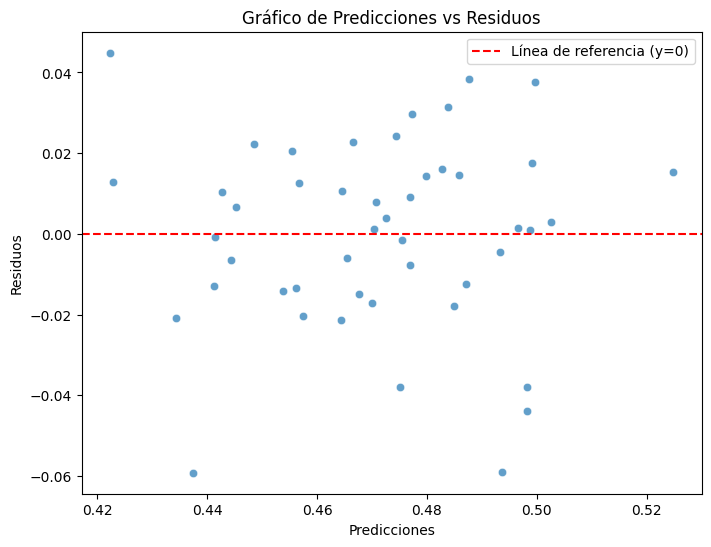


Breusch-Pagan Test Results:
LM Statistic: 1.6287
LM-Test p-value: 0.6529
F-Statistic: 0.5145
F-Test p-value: 0.6745

‚úÖ No hay evidencia de heterocedasticidad. Se cumple el supuesto de homocedasticidad.


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.api import het_breuschpagan

# Calcular predicciones del modelo
y_pred = model.predict(X)

# Calcular los residuos
residuals = model.resid

# üìä 1. Gr√°fico de Predicciones vs Residuos
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', label="L√≠nea de referencia (y=0)")
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gr√°fico de Predicciones vs Residuos')
plt.legend()
plt.show()

# üìä 2. Test de Breusch-Pagan
bp_test = het_breuschpagan(residuals, X)

# Resultados
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
results = dict(zip(labels, bp_test))

print("\nBreusch-Pagan Test Results:")
for key, value in results.items():
    print(f"{key}: {value:.4f}")

# Interpretaci√≥n del p-value
if results['LM-Test p-value'] > 0.05:
    print("\n‚úÖ No hay evidencia de heterocedasticidad. Se cumple el supuesto de homocedasticidad.")
else:
    print("\n‚ùå Hay heterocedasticidad en el modelo. Puede ser necesario aplicar correcciones.")


## No Multiconealidad

- **Qu√© es**: La multicolinealidad se refiere a una alta correlaci√≥n entre las variables independientes. Si las variables independientes est√°n altamente correlacionadas, puede ser dif√≠cil distinguir sus efectos individuales sobre la variable dependiente.

- **Herramientas para verificar la multicolinealidad**:

1. `Matriz de correlaci√≥n`
Se calcula la correlaci√≥n entre todas las variables independientes. Correlaciones altas (por ejemplo, mayores a 0.8 o 0.9) pueden indicar que las variables est√°n altamente correlacionadas, lo cual puede causar problemas en la interpretaci√≥n del modelo.
Interpretaci√≥n: Si las variables tienen correlaciones muy altas entre s√≠, se deber√≠a considerar eliminar o combinar algunas variables para reducir la multicolinealidad.


2. `Variance Inflation Factor (VIF)`
El VIF mide cu√°nto se ha inflado la varianza de los coeficientes debido a la colinealidad entre las variables independientes.
Interpretaci√≥n:
Un VIF mayor a 10 indica una alta multicolinealidad y sugiere que la variable puede estar causando un problema en el modelo.
Un VIF bajo (por debajo de 5) sugiere que la multicolinealidad no es un problema.

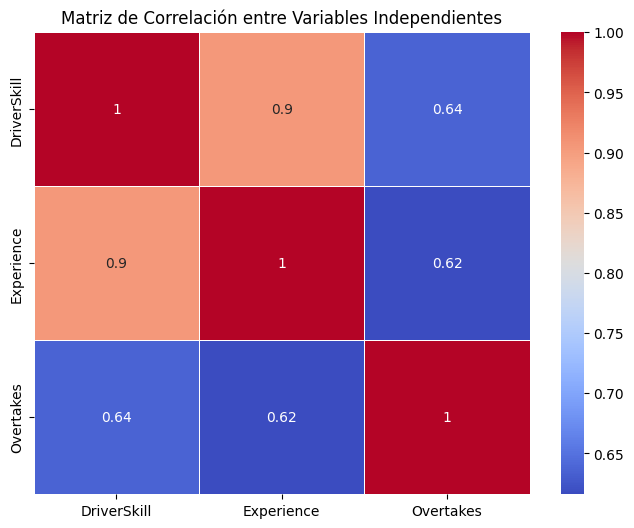


üìä Variance Inflation Factor (VIF) para cada variable independiente:
      Variable        VIF
0  DriverSkill  43.192311
1   Experience   8.435058
2    Overtakes  35.242545

‚ùå Hay variables con alta multicolinealidad (VIF > 10). Considera eliminarlas o combinarlas.


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# üìå 1. Matriz de correlaci√≥n
plt.figure(figsize=(8, 6))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlaci√≥n entre Variables Independientes')
plt.show()

# üìå 2. Calcular el Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostrar los resultados del VIF
print("\nüìä Variance Inflation Factor (VIF) para cada variable independiente:")
print(vif_data)

# Interpretaci√≥n del VIF
high_vif = vif_data[vif_data["VIF"] > 10]
if not high_vif.empty:
    print("\n‚ùå Hay variables con alta multicolinealidad (VIF > 10). Considera eliminarlas o combinarlas.")
else:
    print("\n‚úÖ No hay evidencia de alta multicolinealidad. El modelo es estable.")




El an√°lisis de supuestos es esencial para validar la calidad del modelo de regresi√≥n y asegurar que las inferencias sean confiables. Como vemos se cumple todos los supuestos excepto el supuesto de no multicolinealidad lo que nos sugiere que debamos refactorizar las variables o usar otros enfoques.